## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

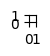

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

In [3]:
@jit(nopython=True)
def time_simul(r1,r2,a11,a22,a12,a21,y01,y02):
    tmax = 2
    y1 = np.zeros(tmax)
    y2 = np.zeros(tmax)
    per_cap1 = np.zeros(tmax)
    per_cap2 = np.zeros(tmax)
    y1_relat = np.zeros(tmax)
    y2_relat = np.zeros(tmax)
    y1[0],y2[0] = y01,y02 # initial conditions
    i,stopRun = 0,0
    while stopRun==0: # stops the simulation when the dynamics converges
        per_cap1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
        per_cap2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
        y1[i+1] = y1[i] * per_cap1[i]
        y2[i+1] = y2[i] * per_cap2[i]
        y1_relat[i]=y1[i]/(y1[i]+y2[i])
        y2_relat[i]=y2[i]/(y1[i]+y2[i])
        per_cap1=np.append(per_cap1,per_cap1[i])
        per_cap2=np.append(per_cap2,per_cap2[i])
        y1=np.append(y1,y1[i])
        y2=np.append(y2,y2[i])
        y1_relat=np.append(y1_relat,y1_relat[i])
        y2_relat=np.append(y2_relat,y2_relat[i])
        if np.abs(y1[i+1]-y1[i]) < 1.0e-3 and np.abs(y2[i+1]-y2[i]) < 1.0e-3:
            stopRun=1
        i+=1
        if i>100:
            break
    return y1,y2,per_cap1,per_cap2,y1_relat,y2_relat

In [4]:
step=2

In [5]:
## Discrete-time competitive Beverton-Holt model
df=open('output.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "N1" + "\t" + "N2" + "\t" + "Coexistence" + "\n" )
for r1 in range(10,21,step):
    for r2 in range(10,21,step):
        for a11 in np.arange(0.1,1.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        ## Strength of stabilization
                        S1 = r2/(1+(a12/a22)*(r2-1))
                        S2 = r1/(1+(a21/a11)*(r1-1))
                        y1 = (r1-1-(a12/a22)*(r2-1))/(a11-a21*a12/a22)
                        y2 = (r2-1-(a21/a11)*(r1-1))/(a22-a21*a12/a11)
                        coexist = y1>0.001 and y2>0.001
                        if np.isnan(y1) or np.isnan(y2):
                            coexist="nan"
                        elif np.isinf(y1) or np.isinf(y2):
                            coexist="inf"
                        elif coexist==True:
                            coexist = 1
                        elif coexist==False:
                            coexist = 0
                        #save
                        df.write( str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1) + "\t" + str(y2) + "\t" + str(coexist)  )
                        df.write('\n')
                        
df.close()

/tmp/ipykernel_19670/3894847772.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  y1 = (r1-1-(a12/a22)*(r2-1))/(a11-a21*a12/a22)
/tmp/ipykernel_19670/3894847772.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  y2 = (r2-1-(a21/a11)*(r1-1))/(a22-a21*a12/a11)
/tmp/ipykernel_19670/3894847772.py:13: RuntimeWarning: invalid value encountered in double_scalars
  y1 = (r1-1-(a12/a22)*(r2-1))/(a11-a21*a12/a22)
/tmp/ipykernel_19670/3894847772.py:14: RuntimeWarning: invalid value encountered in double_scalars
  y2 = (r2-1-(a21/a11)*(r1-1))/(a22-a21*a12/a11)


## Time series

## Parameters

r1=20
r2=13
a12=0.8
a21=0.0
a11=1
a22=1

## Initial conditions

In [6]:
N01,N02=5,5

In [7]:
N1,N2,per_cap1,per_cap2,y1_relat,y2_relat = time_simul(r1,r2,a11,a22,a12,a21,N01,N02)

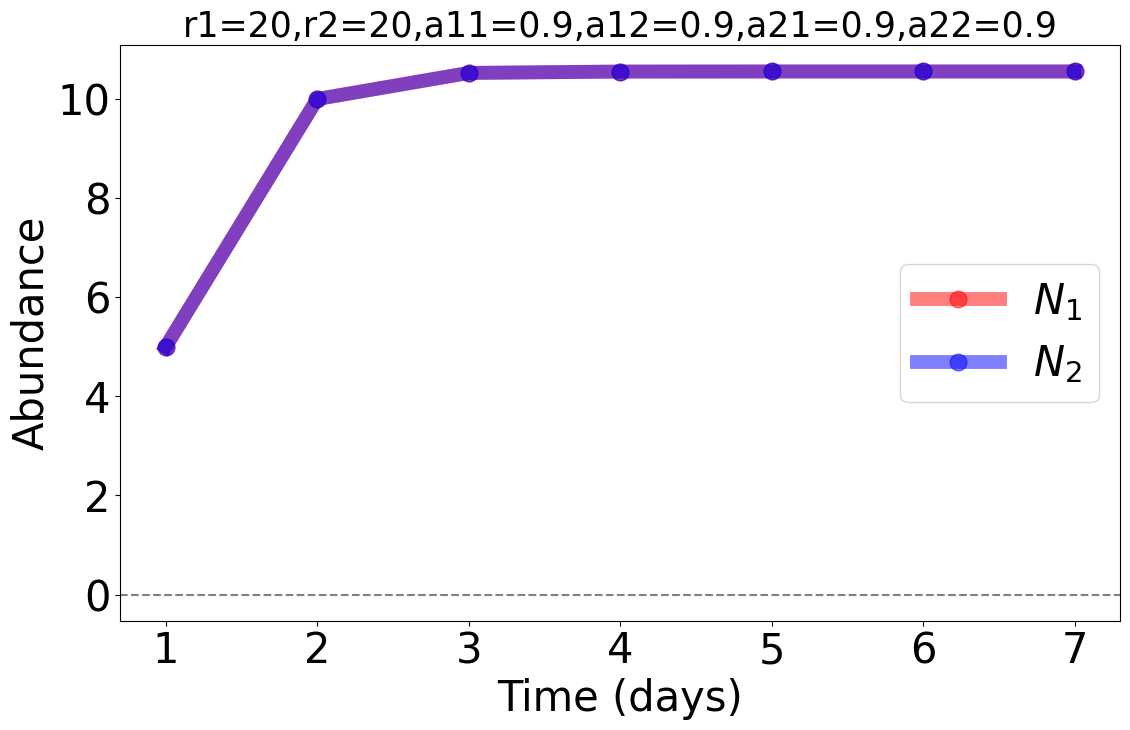

In [8]:
time = np.linspace(1,len(N1),len(N1))

fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(time, N1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, N2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='--')
ax.set(xlabel='Time (days)', ylabel='Abundance')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()

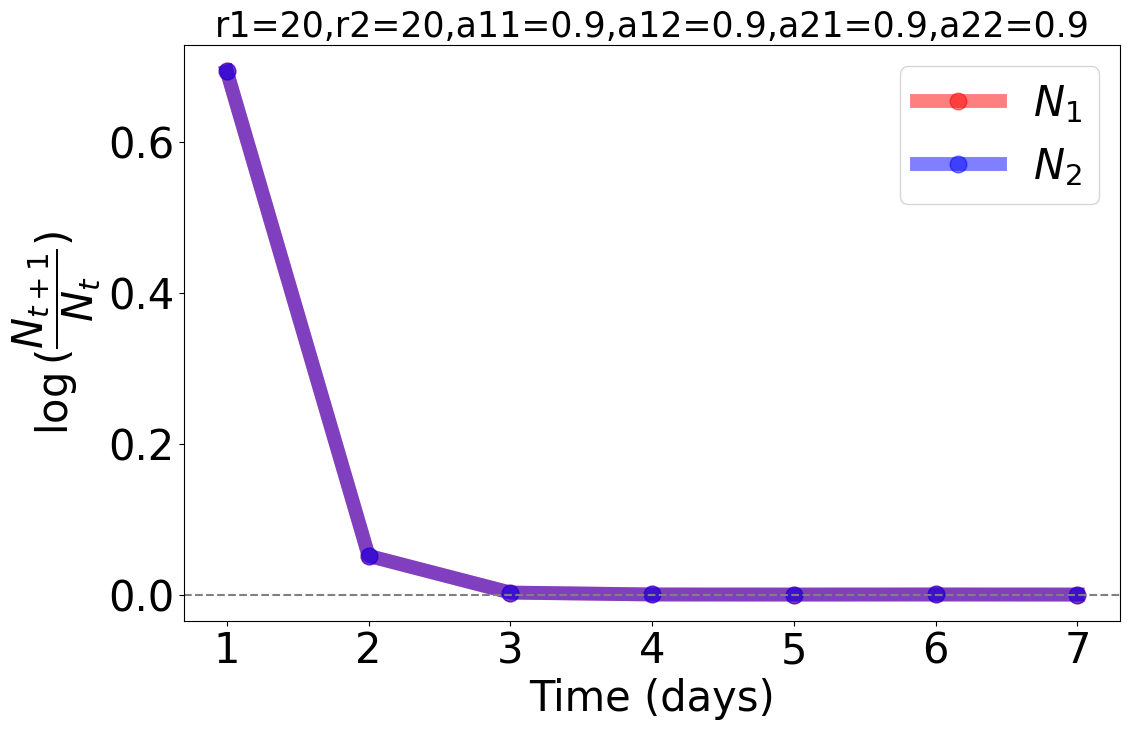

In [9]:
fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(time, np.log(per_cap1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, np.log(per_cap2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='--')
ax.set(xlabel='Time (days)', ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
#plt.savefig('img/PGR_evolution_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()

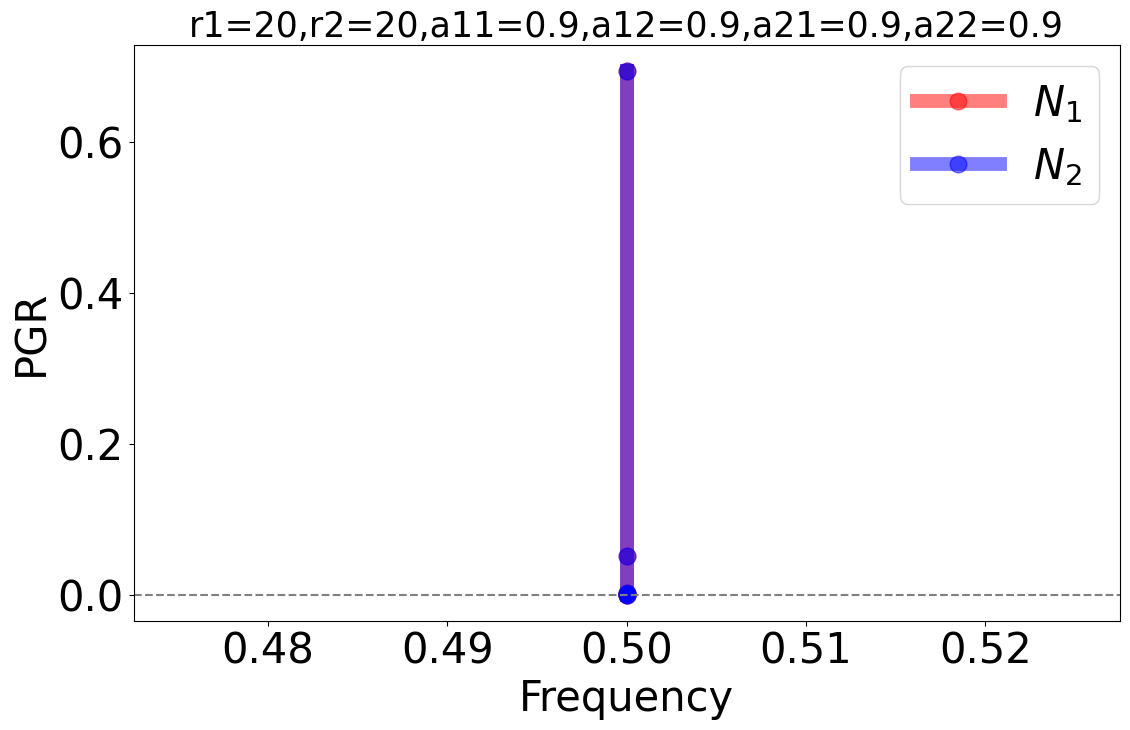

In [10]:
fig, ax = plt.subplots(1,figsize=(12, 8))
ax.plot(y1_relat, np.log(per_cap1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y2_relat, np.log(per_cap2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='--')
ax.set(xlabel='Frequency',ylabel='PGR')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_PGR_time_series_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()